<a href="https://colab.research.google.com/github/mayssajeb94/Test_DS/blob/master/Test_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

#This will ask for permission
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.==  Read data
Enter your Json file:/content/drive/My Drive/Brisbane_CityBike.json
2.choise of groupe number


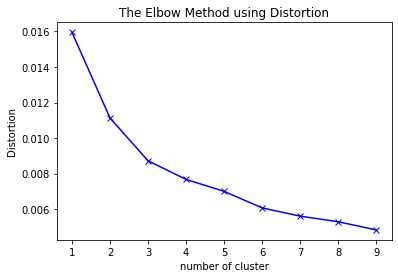

enter the appropriate number of groups:3
3.clustering Data
4.export Data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,latitude,longitude,name,address,number,groupe
127,-27.482081,152.995804,142 - SYLVAN RD / CORONATION DR,Sylvan Rd / Coronation Dr,142,0
34,-27.468845,153.007364,134 - RAILWAY TCE / CRIBB ST,Railway Tce / Cribb St,134,0
37,-27.476003,153.000676,140 - DUNMORE TCE / KINGSFORD ST,Dunmore Tce / Kingsford St,140,0
112,-27.480885,153.014585,102 - BESANT ST / VULTURE ST,Besant St / Vulture St,102,0
128,-27.478235,153.015173,101 - RUSSELL ST / EDMONDSTONE ST,Russell St / Edmondstone St,101,0
...,...,...,...,...,...,...
62,-27.470190,153.025852,15 - ALBERT STREET MALL / ELIZABETH STREET,Albert St Mall / Elizabeth St,15,2
59,-27.471297,153.022570,26 - NORTH QUAY / REDDACLIFF PLACE,North Quay /Reddacliff Place,26,2
57,-27.469075,153.021808,29 - GEORGE STREET / ANN STREET,George St / Ann St,29,2
103,-27.466753,153.020012,33 - ROMA ST / HERSCHEL ST,Roma St / Herschel St,33,2


In [24]:
#import the necessary libraries
import warnings
import pandas as pd
import numpy as np
import json
from sklearn import cluster
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt


#initialize the variables
distortions = []  #It is calculated as the average of the squared distances from the cluster centers of the respective clusters.
inertias = [] #It is the sum of squared distances of samples to their closest cluster center.
mapping1 = {} 
mapping2 = {} 
K = range(1,10) #Limit the number of groups between 1 and 10
n=0
#function to read dataset in first time form json file, and then convert it into dataframe.
def readData():   
    
    with open(file) as f:
         d = json.load(f)
         df = pd.DataFrame.from_dict(d, orient='columns')
         return df

#function to remove the warning by using the catch_warnings context handler:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    
    
# =============================================================================
# main function
# Perform a clustering based on either the location or characteristics of 
# bike stations.
# =============================================================================

#read json file
print("1.==  Read data")
file = input("Enter your Json file:")
#file = 'Brisbane_CityBike.json'
data = readData()
newdf = data[['latitude','longitude']]


#•Detrmine the optimal nubmer of k
print("2.choise of groupe number")
for k in K: 
    #Building and fitting the model 
    kmeanModel = cluster.KMeans(n_clusters=k).fit(newdf) 
    kmeanModel.fit(newdf)     
      
    distortions.append(sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / newdf.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / newdf.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

#To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point
#after which the distortion/inertia start decreasing in a linear fashion
plt.plot(K, distortions, 'bx-') 
plt.xlabel('number of cluster') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

#according to the elbow method, we can know the best
#number of groups to choose.    
n_cluster = int(input("enter the appropriate number of groups:"))



#clustering
print("3.clustering Data")
kmeans = cluster.KMeans(n_clusters=n_cluster)
kmeans.fit(newdf)
#index sorted groups
idk = np.argsort(kmeans.labels_)
#displaying observations and their groups
output=newdf.iloc[idk]

output['name']=data['name'][idk]
output['address']=data['address'][idk]
output['number']=data['number'][idk]
output['longitude']=data['longitude'][idk]
output['latitude']=data['latitude'][idk]
output['groupe']=kmeans.labels_[idk]



print("4.export Data")
#write result to csv files
output.to_csv('Groupe.csv')
output
